In [550]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [551]:
! kaggle datasets download -d mohabdullah/titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [552]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [553]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Feature Engineering
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder, OneHotEncoder , MinMaxScaler
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline


In [554]:
data_train=pd.read_csv("/content/train.csv")

In [555]:
data_test=pd.read_csv("/content/test.csv")

In [556]:
data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [557]:
data_train.shape

(891, 12)

In [558]:
data_test.shape

(418, 11)

In [559]:
data_test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [560]:
# Concatenate train_data and test_data into a single DataFrame
data = pd.concat([data_train, data_test], ignore_index=True)


In [561]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [562]:
data.shape

(1309, 12)

In [563]:
data.drop(["PassengerId"],inplace=True,axis=1)
data.drop(["Name"],inplace=True,axis=1)

In [564]:
# To test if there are duplicates in the dataset or not
print ( data.duplicated() )

print ( data.duplicated().sum() )

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool
16


In [565]:
# To get the nuumerical features in the dataset
numeric_features = data.select_dtypes(include=np.number)
numeric_columns= numeric_features.columns
numeric_features = list(numeric_columns)
print ( " The dataset contains " , len(numeric_features) , " numeric features which are : " )
print(numeric_features)

 The dataset contains  6  numeric features which are : 
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [566]:
# To get the number of unique values in each numerical feature
for feature in numeric_features:
    print('The feature is {} and number of unique values are {}'.format(feature,len(data[feature].unique())))

The feature is Survived and number of unique values are 3
The feature is Pclass and number of unique values are 3
The feature is Age and number of unique values are 99
The feature is SibSp and number of unique values are 7
The feature is Parch and number of unique values are 8
The feature is Fare and number of unique values are 282


In [567]:
# To get the categorical features in the dataframe
categoric_features = data.select_dtypes(exclude = 'number')
categoric_columns= categoric_features.columns
categoric_features = list(categoric_columns)

# To add these two features to categoric features list as they contains true , false

print ( " The train dataframe contains " , len(categoric_features) ," categoric features which are : " )
print(categoric_features)

 The train dataframe contains  4  categoric features which are : 
['Sex', 'Ticket', 'Cabin', 'Embarked']


In [568]:
# To get the number of unique categories in each feature
for feature in categoric_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Sex and number of categories are 2
The feature is Ticket and number of categories are 929
The feature is Cabin and number of categories are 187
The feature is Embarked and number of categories are 4


In [569]:
data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [570]:
# To get the number of null values in each feature ( missing values )
for feature in data :
    print( feature , " : " , data[feature].isna().sum() )

Survived  :  418
Pclass  :  0
Sex  :  0
Age  :  263
SibSp  :  0
Parch  :  0
Ticket  :  0
Fare  :  1
Cabin  :  1014
Embarked  :  2


In [571]:
#Total columns having missing values
cols_missing= data.isnull().sum() != 0
cols_missing.sum()

5

In [572]:
# Fill missing values in the of numeric features with appropriate method ( the median )
numeric_features = data.select_dtypes(include=np.number)
for feature in numeric_features :
    data[feature].fillna(data[feature].median(), inplace=True)

In [573]:
# Fill missing values in the rest of categorical features with appropriate method ( the mode )
categorical_features = data.select_dtypes(include=object)
for feature in categorical_features :
    data[feature].fillna(data[feature].mode()[0], inplace=True)

In [574]:
# To get the number of null values in each feature ( missing values )
for feature in data :
    print( feature , " : " , data[feature].isna().sum() )

Survived  :  0
Pclass  :  0
Sex  :  0
Age  :  0
SibSp  :  0
Parch  :  0
Ticket  :  0
Fare  :  0
Cabin  :  0
Embarked  :  0


In [575]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Cabin     1309 non-null   object 
 9   Embarked  1309 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 102.4+ KB


In [576]:
label_encoder = preprocessing.LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

<Axes: xlabel='Pclass', ylabel='Survived'>

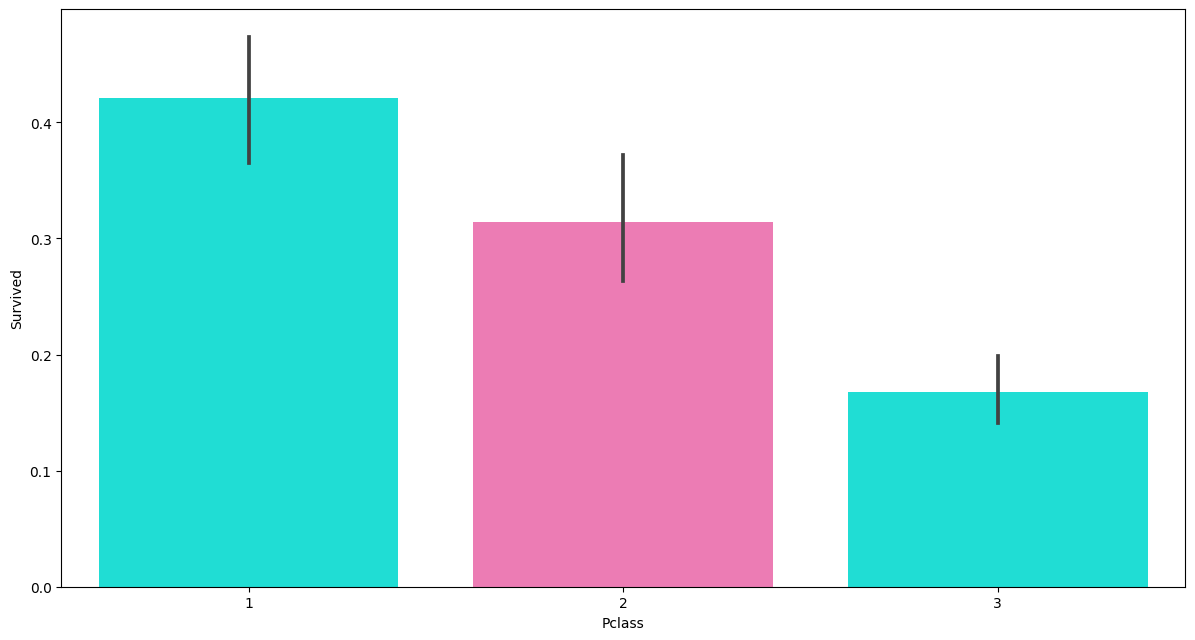

In [577]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data, palette=["#00fdf0","hotpink"])

<Axes: xlabel='Age', ylabel='Survived'>

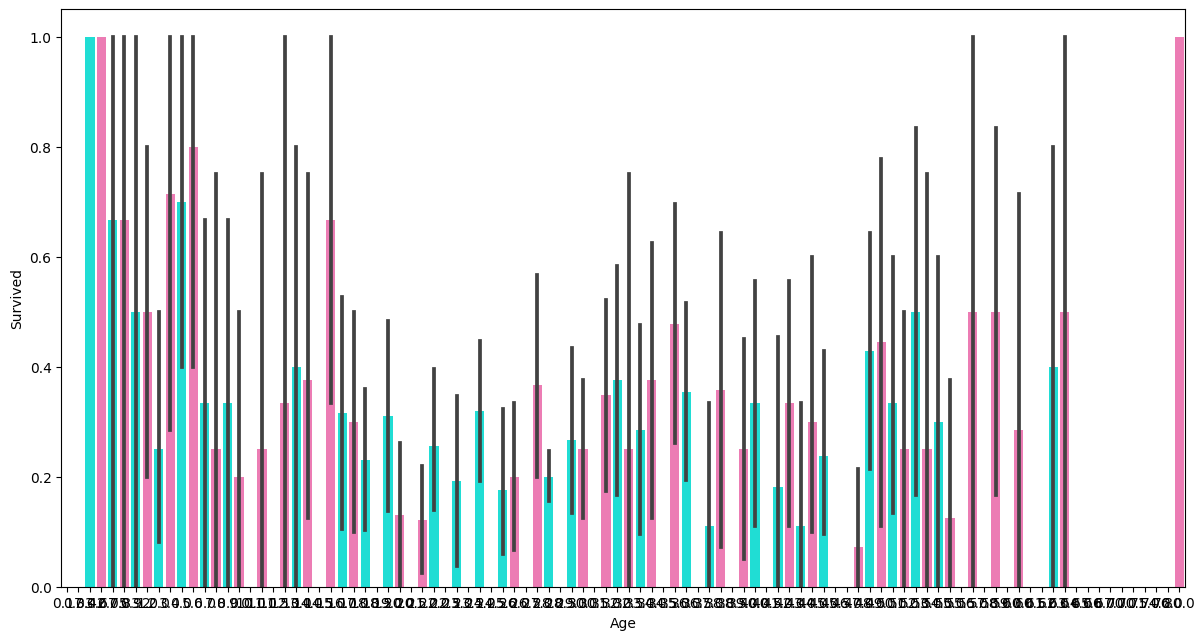

In [578]:
figure(figsize=(5, 8))
sns.barplot(x = 'Age', y = 'Survived', data = data, palette=["#00fdf0","hotpink"])

<Axes: xlabel='count', ylabel='SibSp'>

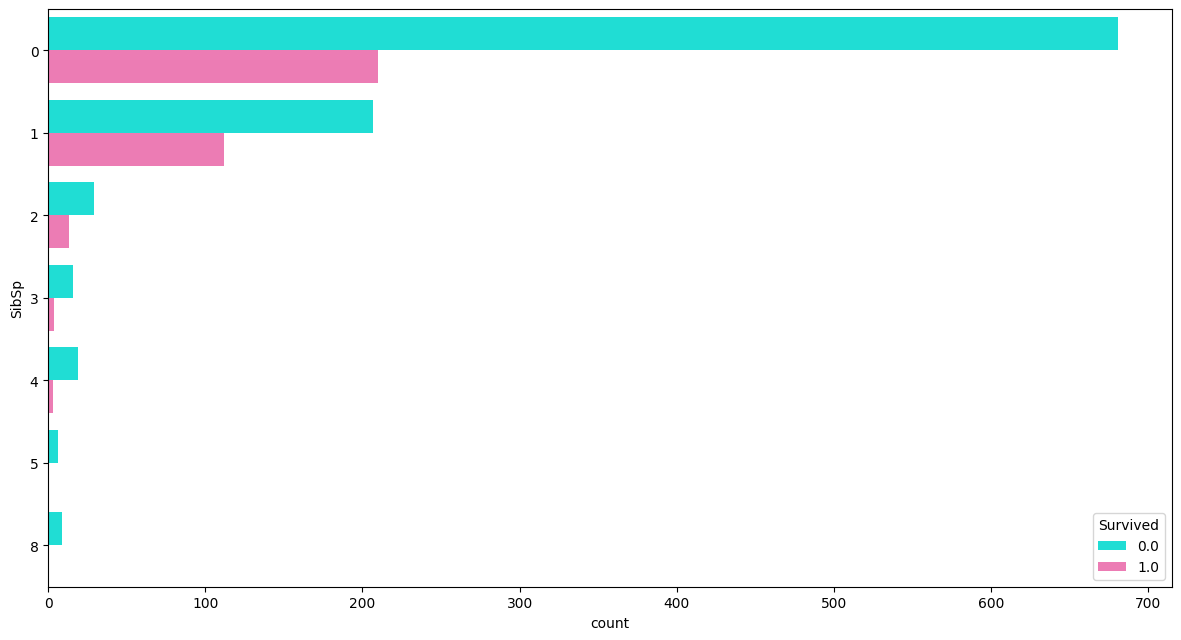

In [579]:
sns.countplot(y='SibSp', hue='Survived', data=data, palette=["#00fdf0","hotpink"])

<Figure size 500x800 with 0 Axes>

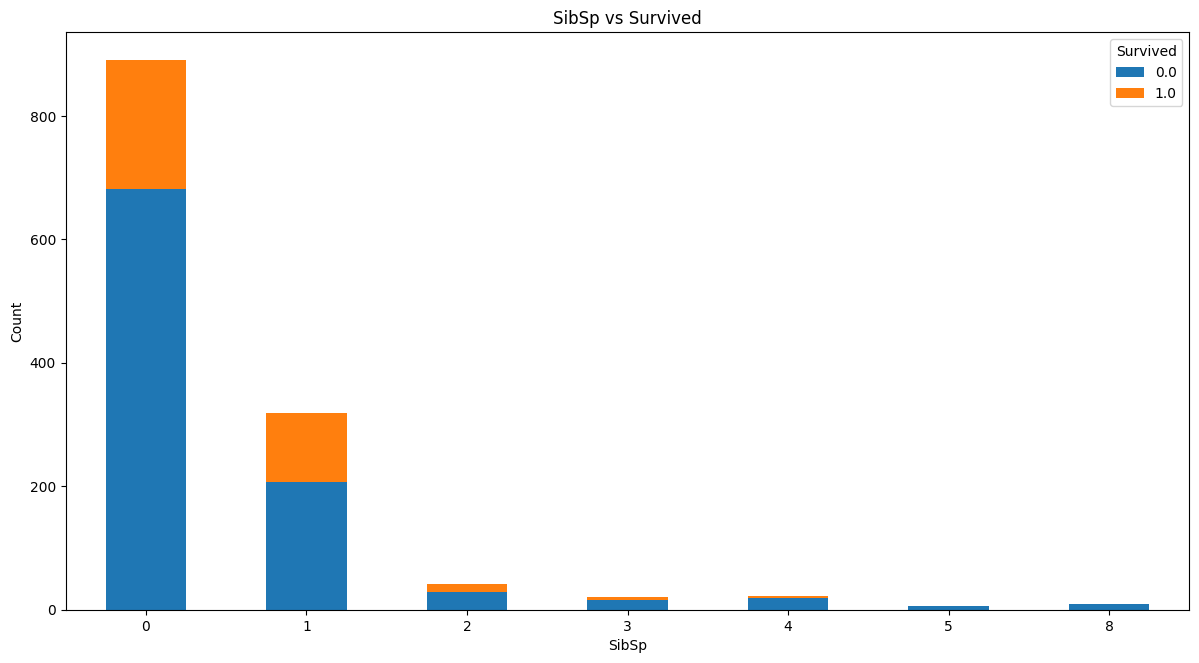

In [580]:
# Creating a stacked bar plot to visualize the relationship between Credit Grade and Loan Status
plt.figure(figsize=(5, 8))
pd.crosstab(data['SibSp'], data['Survived']).plot(kind='bar', stacked=True)
plt.title('SibSp vs Survived')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='count', ylabel='Age'>

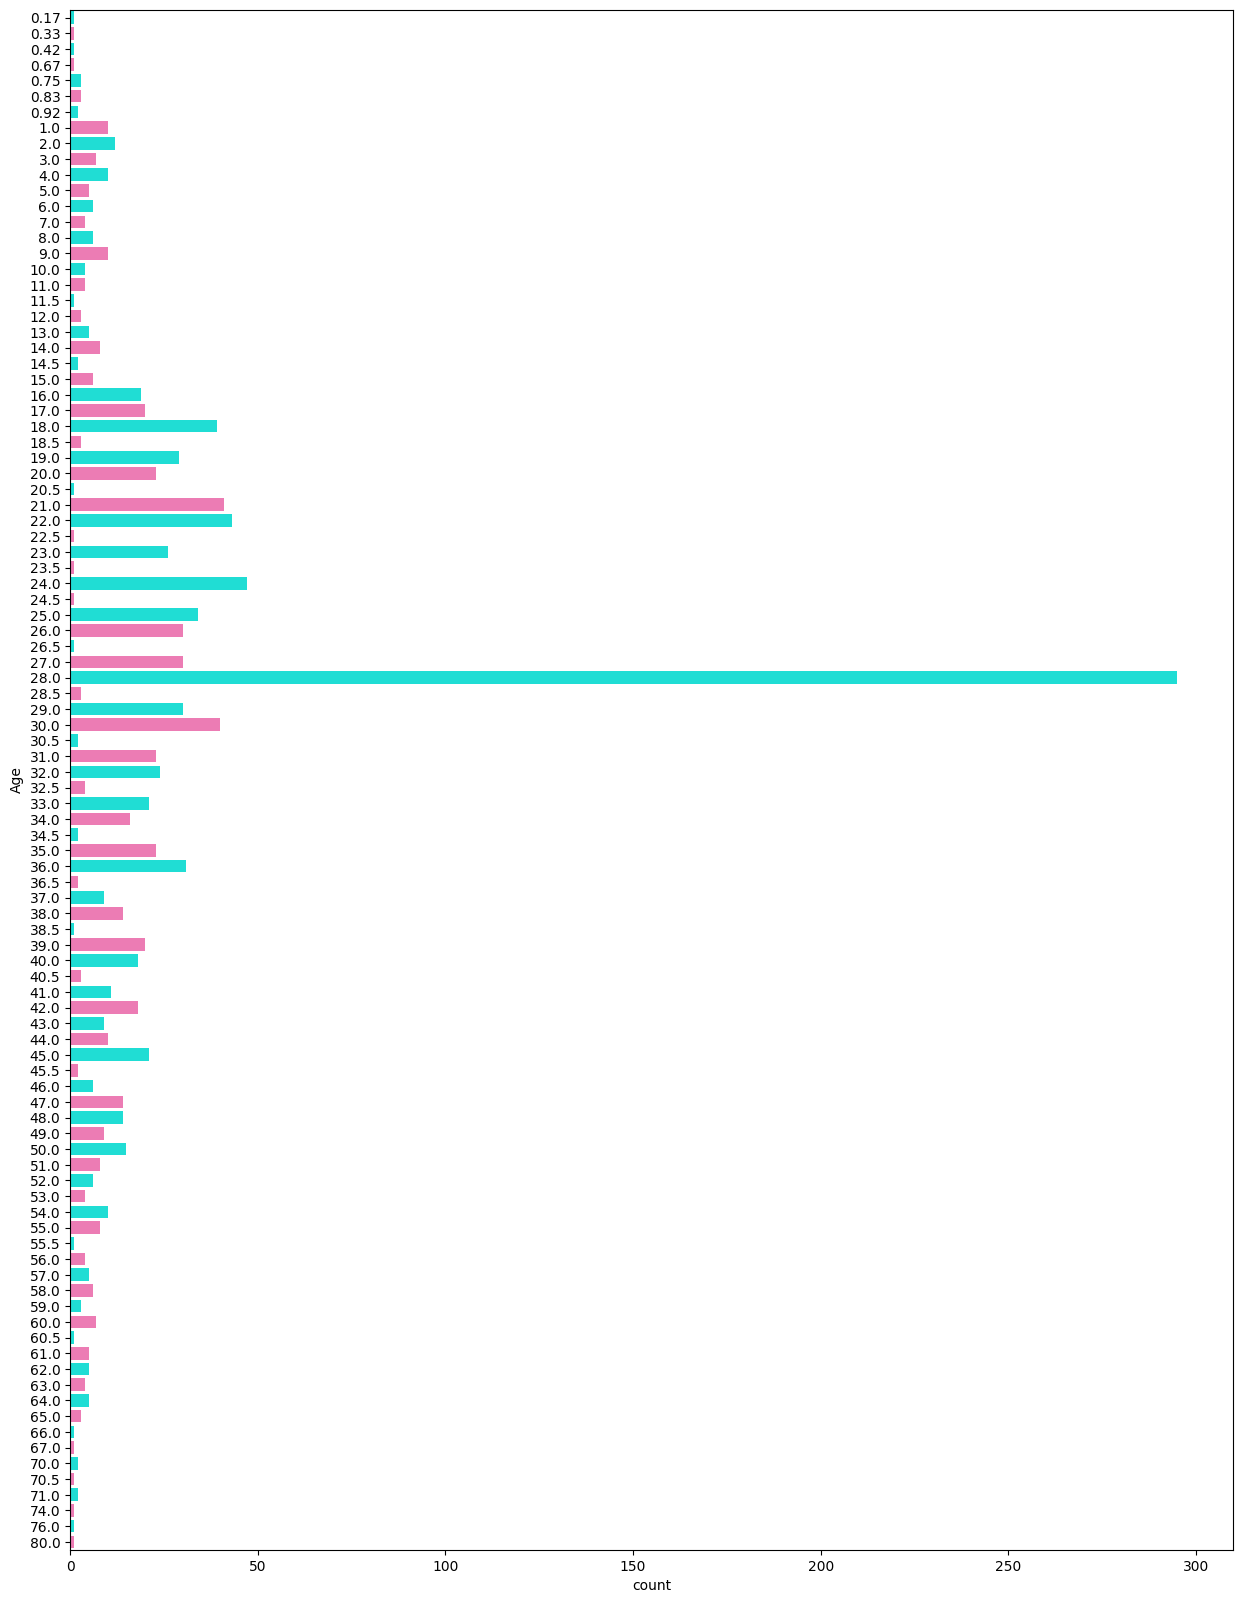

In [581]:
plt.figure(figsize=(15,20))
sns.countplot(y='Age', data=data, palette=["#00fdf0","hotpink"])

<Axes: xlabel='count', ylabel='Survived'>

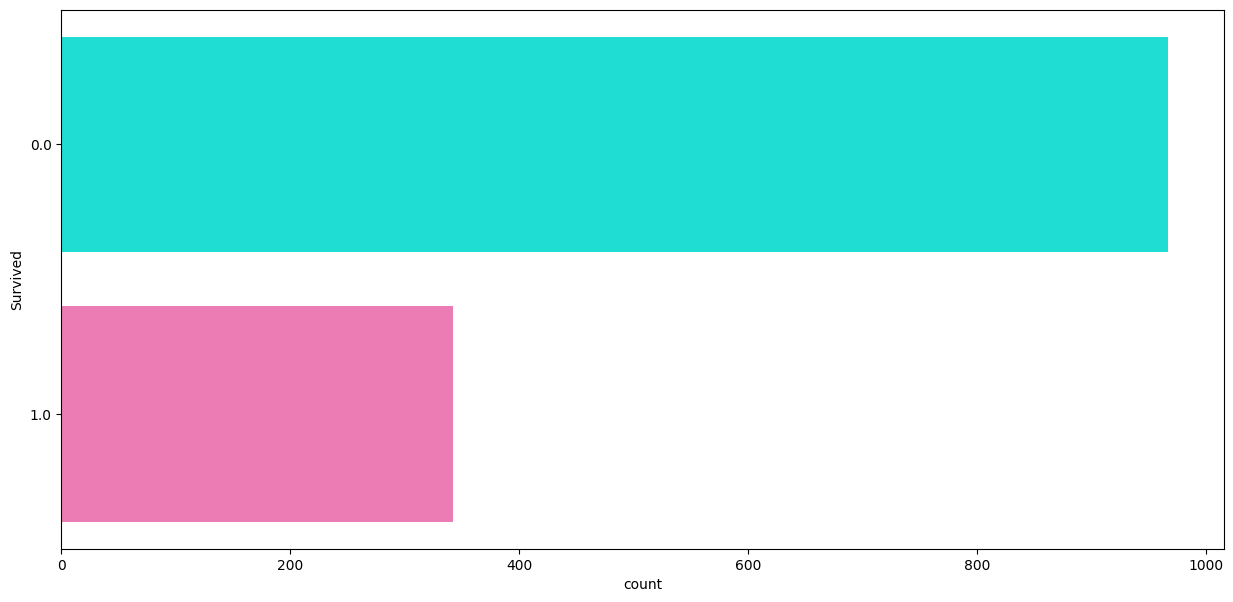

In [582]:
plt.figure(figsize=(15,7))
sns.countplot(y=data['Survived'], palette=["#00fdf0","hotpink"])

<Axes: xlabel='count', ylabel='SibSp'>

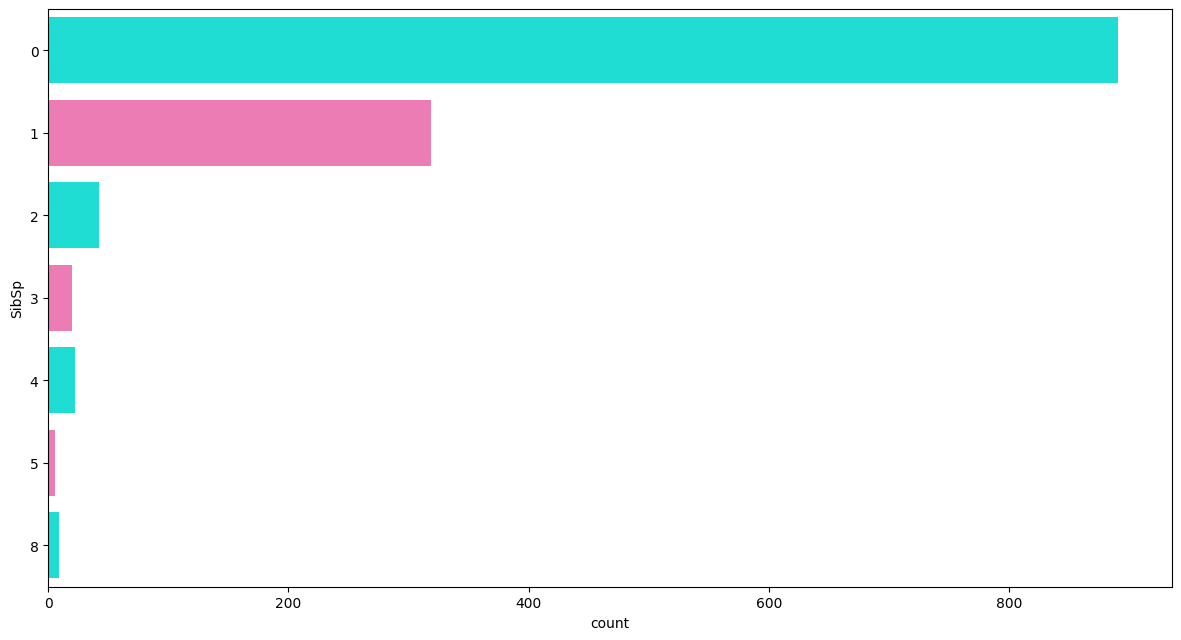

In [583]:
sns.countplot(y=data['SibSp'], palette=["#00fdf0","hotpink"])

<Figure size 1000x500 with 0 Axes>

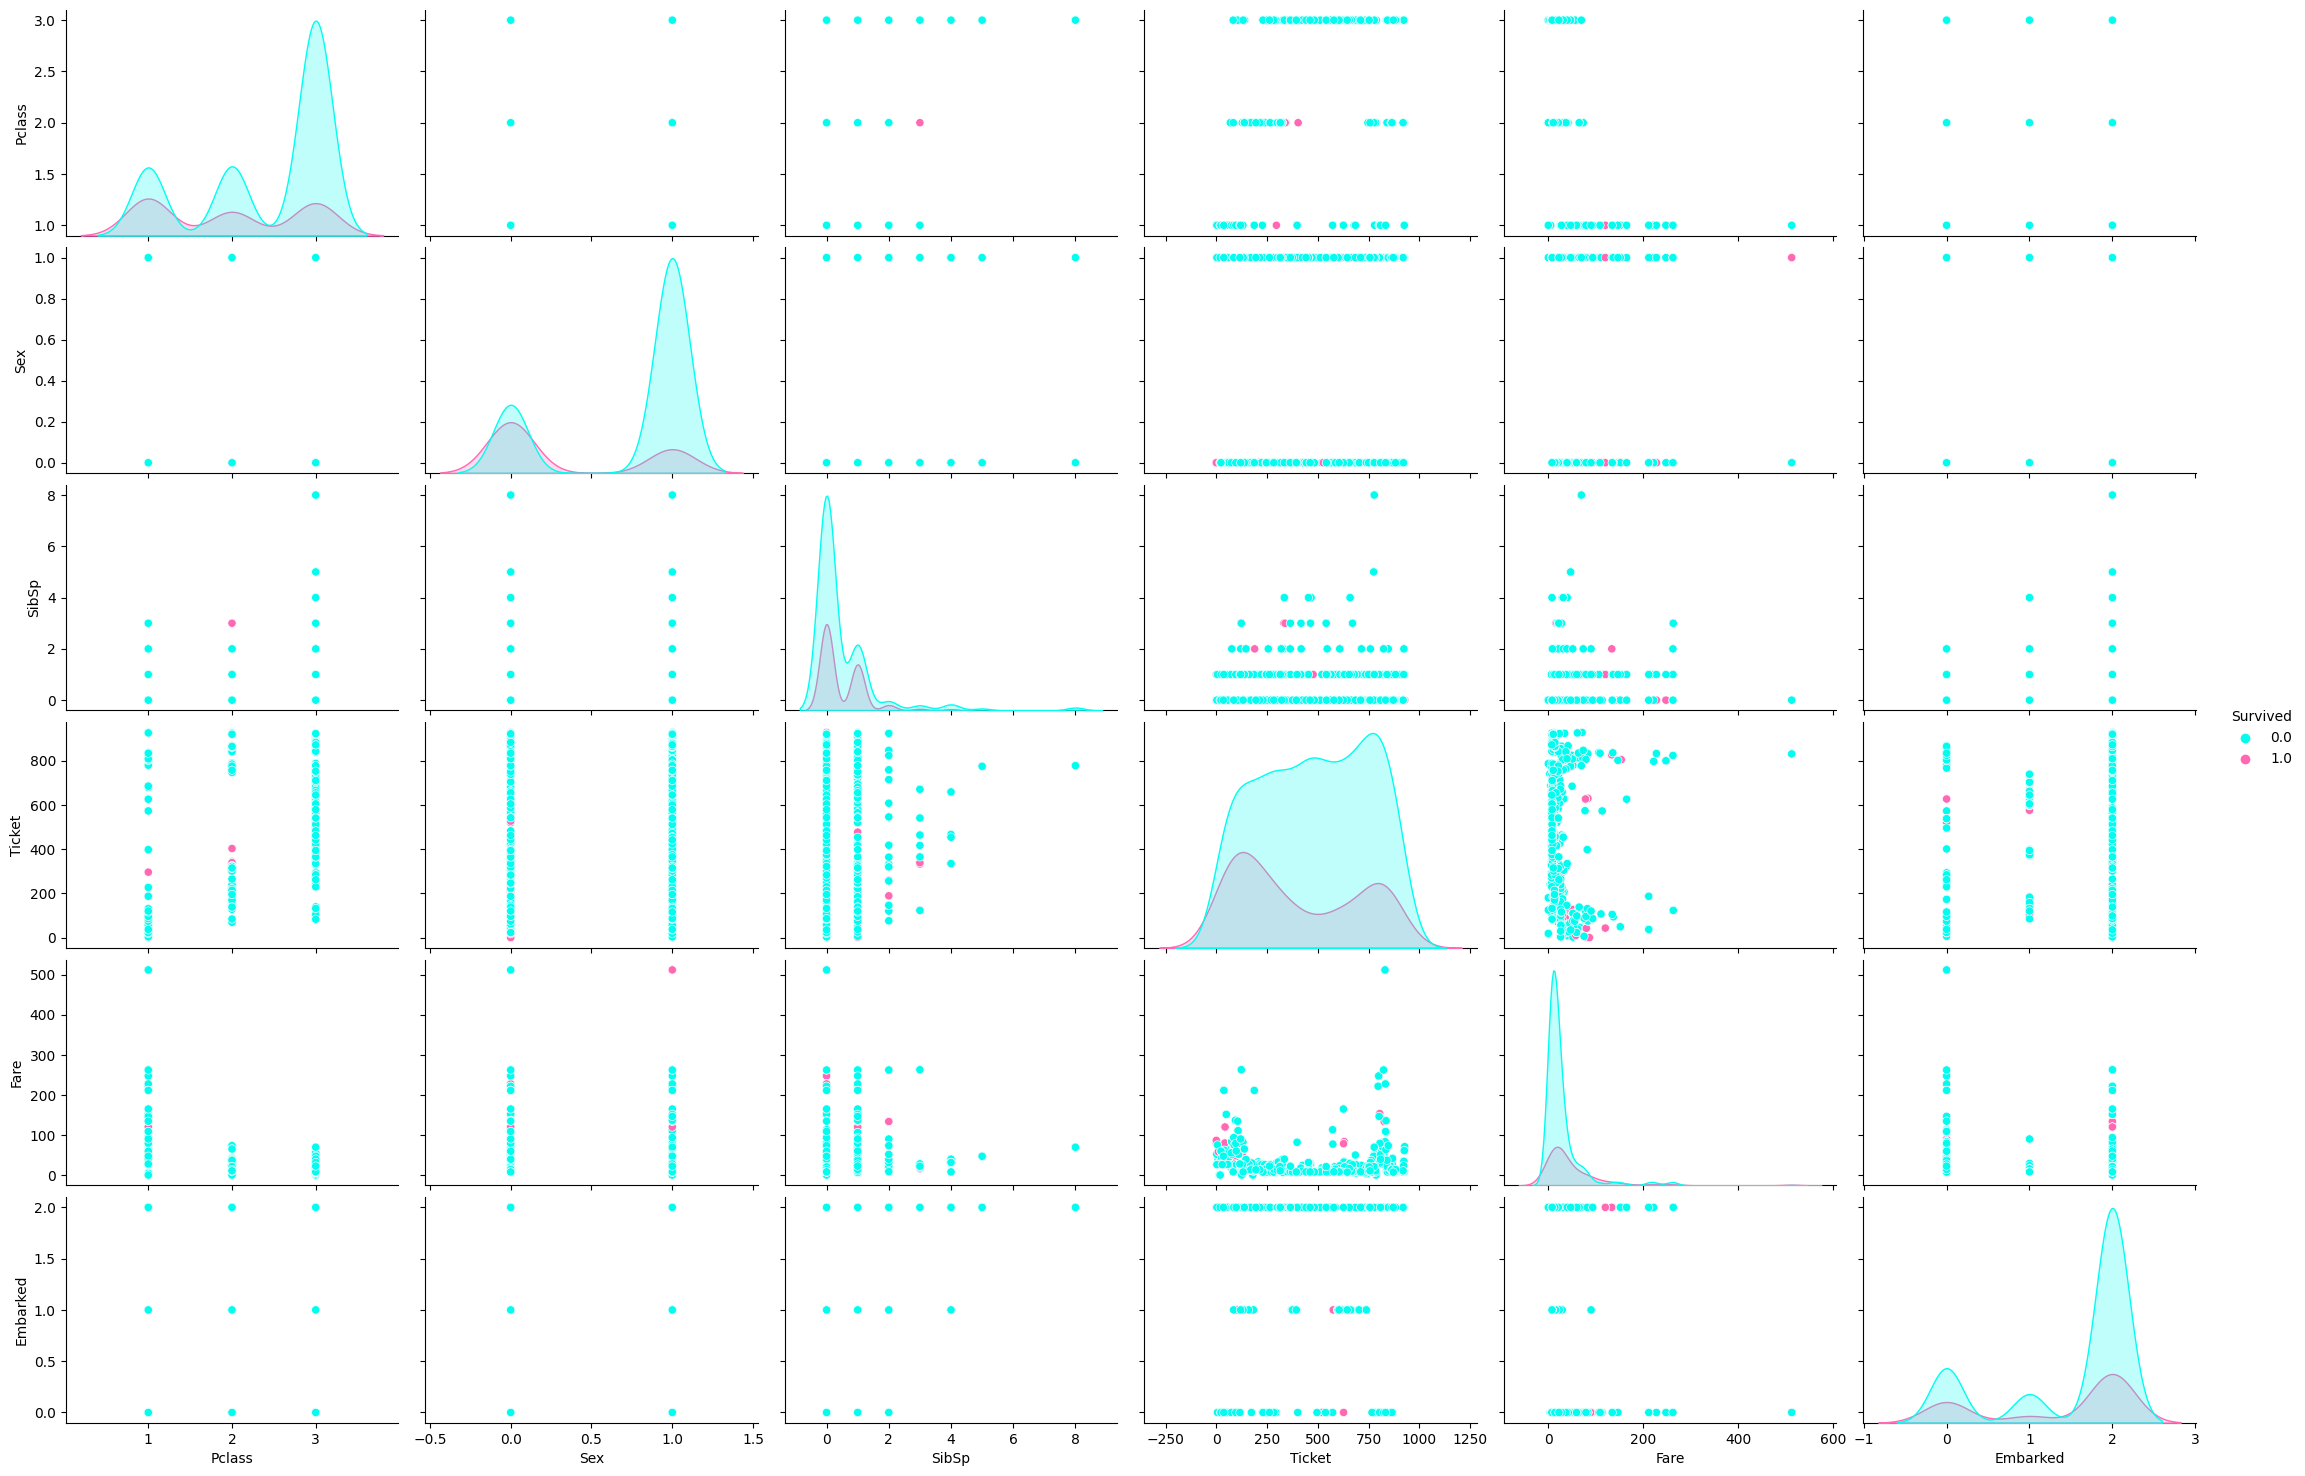

In [584]:
plt.figure(figsize=(10, 5))
sns.pairplot(data, x_vars=['Pclass', 'Sex', 'SibSp', 'Ticket', 'Fare', 'Embarked'],
             y_vars=['Pclass', 'Sex', 'SibSp', 'Ticket', 'Fare', 'Embarked'], hue="Survived", palette=["#00fdf0","hotpink"],aspect=1.5)

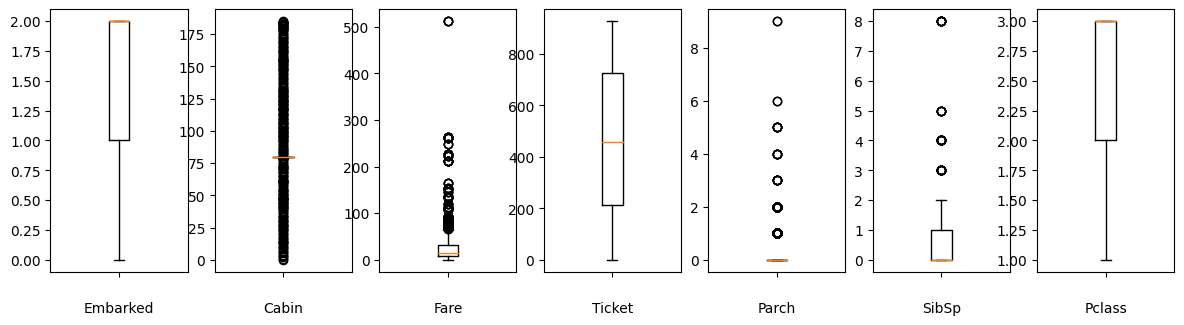

In [587]:
plt.rcParams["figure.figsize"] = [14.50, 7.50]
plt.subplot(271)
plt.boxplot(data['Embarked'],labels=' ');
plt.xlabel('Embarked')
plt.subplot(272)
plt.boxplot(data['Cabin'],labels=' ');
plt.xlabel('Cabin')
plt.subplot(273)
plt.boxplot(data['Fare'],labels=' ');
plt.xlabel('Fare')
plt.subplot(274)
plt.boxplot(data['Ticket'],labels=' ');
plt.xlabel('Ticket');
plt.subplot(275)
plt.boxplot(data['Parch'],labels=' ');
plt.xlabel('Parch');
plt.subplot(276)
plt.boxplot(data['SibSp'],labels=' ');
plt.xlabel('SibSp');
plt.subplot(277)
plt.boxplot(data['Pclass'],labels=' ');
plt.xlabel('Pclass');

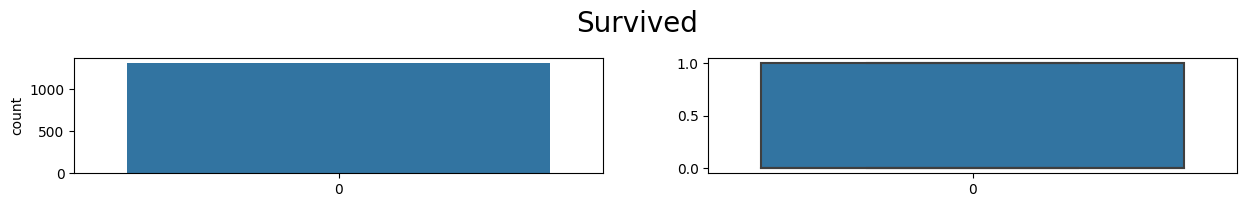

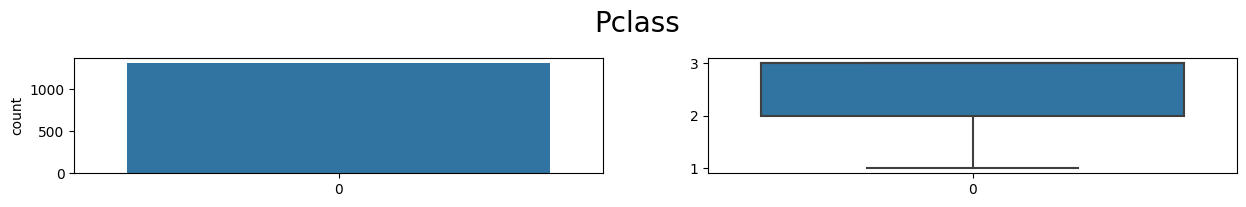

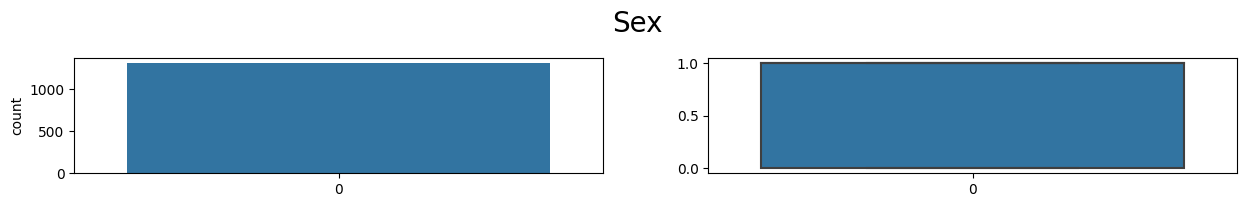

<ipython-input-588-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


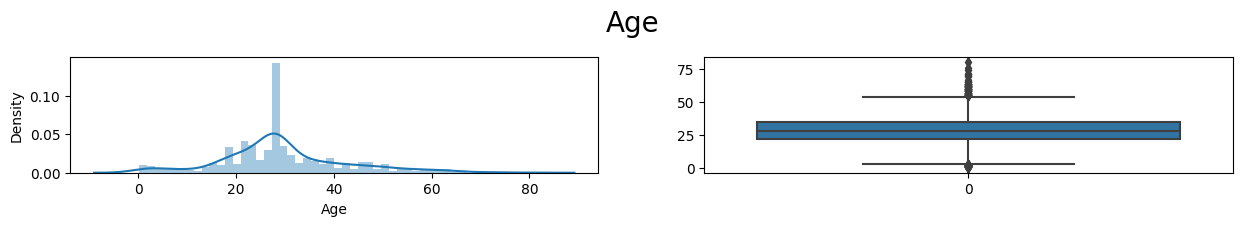

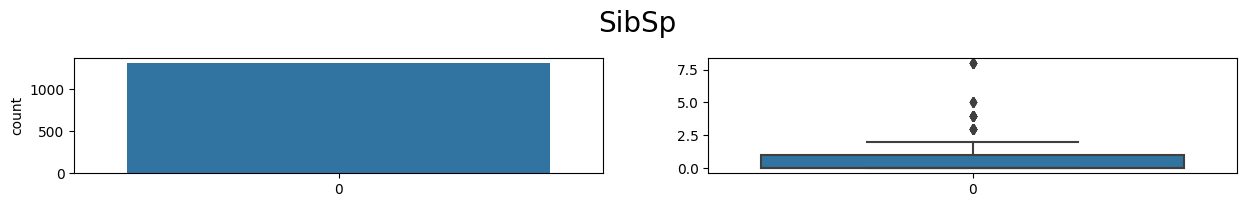

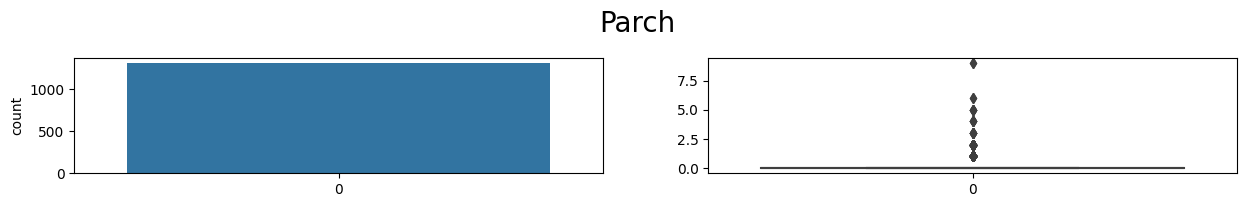

<ipython-input-588-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


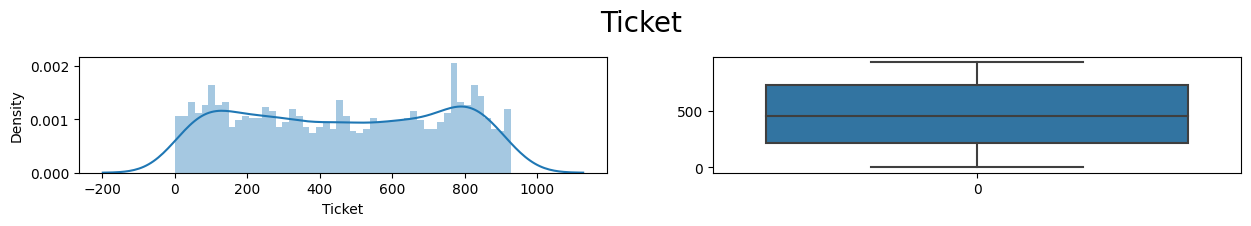

<ipython-input-588-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


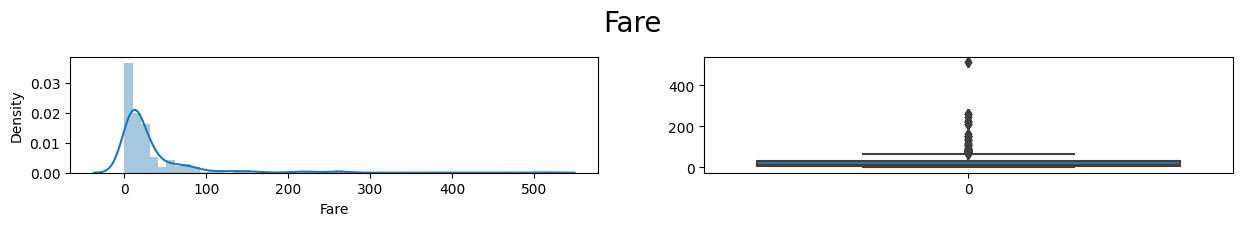

<ipython-input-588-092eb4852acd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])


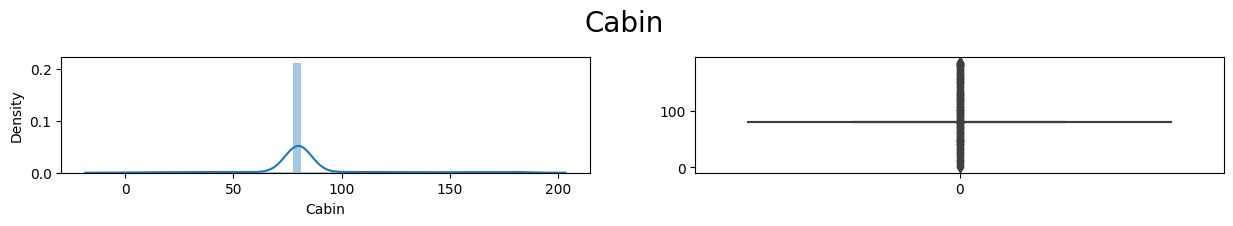

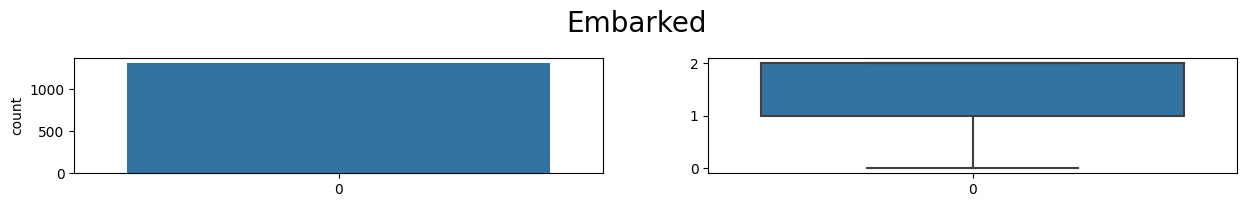

In [588]:
for col in data.columns:
    fig,ax = plt.subplots(1,2,figsize=(15,1.5))
    if len(np.unique(data[col]))<10:
        sns.countplot(data[col],ax=ax[0])
    else:
        sns.distplot(data[col],bins=50 if len(np.unique(data[col]))>50 else None,ax=ax[0])

    sns.boxplot(data[col],ax=ax[1])
    plt.suptitle(col,fontsize=20,y=1.2)
    plt.show()

In [589]:
# To replace outliers in specific features whether with max , min values in the column
for x in (data):
    Q3,Q1 = np.percentile(data.loc[:,x],[75,25])
    IQR = Q3-Q1

    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)

    data.loc[data[x] > max,x] = max
    data.loc[data[x] <min,x] = min

In [590]:
# Spliting target variable and independent variables
X = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [591]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
import numpy as np



# 1. Mutual Information (MI) Score
mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_top_6_features = mi_scores_df.sort_values(by='MI Score', ascending=False).head(20)

# 2. Chi2
chi2_selector = SelectKBest(score_func=chi2, k=6)
chi2_selector.fit(X, y)
chi2_top_6_features = X.columns[chi2_selector.get_support()]

# 3. ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=15, random_state=0)
etc.fit(X, y)
etc_importances = etc.feature_importances_
etc_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': etc_importances})
etc_top_6_features = etc_importances_df.sort_values(by='Importance', ascending=False).head(20)

# Print selected features for each method
print("Top 6 features based on Mutual Information (MI) Score:")
print(mi_top_6_features)
print()

print("Top 6 features based on Chi2:")
print(chi2_top_6_features)
print()

print("Top 6 features based on ExtraTreesClassifier:")
print(etc_top_6_features)


Top 6 features based on Mutual Information (MI) Score:
    Feature  MI Score
1       Sex  0.090041
5    Ticket  0.076828
6      Fare  0.075169
0    Pclass  0.020183
8  Embarked  0.014513
4     Parch  0.005344
7     Cabin  0.000585
2       Age  0.000000
3     SibSp  0.000000

Top 6 features based on Chi2:
Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked'], dtype='object')

Top 6 features based on ExtraTreesClassifier:
    Feature  Importance
5    Ticket    0.284247
2       Age    0.252876
6      Fare    0.171111
1       Sex    0.163893
0    Pclass    0.056378
3     SibSp    0.039367
8  Embarked    0.032127
4     Parch    0.000000
7     Cabin    0.000000


In [592]:
# Spliting target variable and independent variables
X = data[['Pclass', 'Sex', 'SibSp', 'Ticket', 'Fare', 'Embarked']]
y = data['Survived']

In [620]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 43)

In [621]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
StandardScaler()
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.83371228,  0.75265488, -0.61300086, -0.68815573, -0.82027578,
        -1.87292877],
       [ 0.83371228,  0.75265488, -0.61300086,  0.24191165, -0.78788254,
         0.61305443],
       [ 0.83371228,  0.75265488,  2.33140285,  1.65503728,  0.49081003,
         0.61305443],
       ...,
       [-0.36398658, -1.3286302 ,  0.859201  ,  1.09267096,  0.17088578,
         0.61305443],
       [-0.36398658,  0.75265488, -0.61300086, -1.03422731, -1.16917431,
         0.61305443],
       [ 0.83371228, -1.3286302 , -0.61300086, -0.7963031 , -0.43294771,
        -1.87292877]])

In [622]:
lr=LogisticRegression()

In [623]:
# Fit the logistic regression model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8244274809160306


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [624]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100,min_samples_split=10, min_samples_leaf=15, random_state=15)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8320610687022901


In [625]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=200,max_depth=5, random_state=43)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gbc= gb.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", accuracy)

Accuracy: 0.7709923664122137


In [626]:
# import machine learning libraries
import xgboost as xgb

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


In [627]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [628]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [630]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.790523582273593, 'gamma': 3.4135733721835315, 'max_depth': 14.0, 'min_child_weight': 2.0, 'reg_alpha': 89.0, 'reg_lambda': 0.5603136126922269}


In [633]:
model=xgb.XGBClassifier(colsample_bytree= 0.790523582273593,
                        gamma= 3.4135733721835315, max_depth= 14,
                        min_child_weight= 2,
                        reg_alpha=89,
                        reg_lambda= 0.5603136126922269)


In [634]:
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb= model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.7633587786259542
